In [3]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


In [4]:
from keras.layers import Dense, Activation

model.add(Dense(output_dim=64, input_dim=100))
model.add(Activation("relu"))
model.add(Dense(output_dim=10))
model.add(Activation("softmax"))

/home/hastings/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=64, input_dim=100)`
  app.launch_new_instance()
/home/hastings/.local/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`


In [5]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

/home/hastings/.local/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 9 + 1) instead


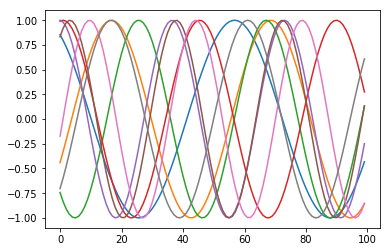

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def makeData(N):

    freq = np.random.random_integers(0, 9, N)
    offset = np.random.random(N) * 10
    classes = np.zeros((N, 10))
    classes[range(N), freq] = 1
    data = np.sin(np.linspace(0, 100, 100).reshape((1, -1)) * (freq + 10).reshape(-1, 1) / 100 + offset.reshape(-1, 1))
    return data, classes
data, classes = makeData(10000)
td, tc = makeData(100)
plt.plot(td[0:8].transpose())
plt.show()

In [7]:
model.fit(data, classes, batch_size=32, nb_epoch=10 )

Epoch 1/10
 1376/10000 [===>..........................] - ETA: 0s - loss: 2.3791 - acc: 0.1388

/home/hastings/.local/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


10000/10000 [==============================] - 0s - loss: 1.7800 - acc: 0.3987     
Epoch 2/10
10000/10000 [==============================] - 0s - loss: 1.1802 - acc: 0.7397     

In [8]:
model.evaluate(td, tc)

 32/100 [========>.....................] - ETA: 0s

[0.18734204530715942, 1.0]

In [9]:
model.predict(np.zeros((1, 100)) + .12)

array([[ 0.14053695,  0.11886939,  0.06670118,  0.07441083,  0.08867534,
         0.06360651,  0.10200003,  0.13183555,  0.10759869,  0.10576557]], dtype=float32)

In [10]:
model.predict(td[0:1, :])

array([[  9.43812013e-01,   5.52750155e-02,   1.98978756e-04,
          4.81265306e-06,   1.95497842e-06,   1.93455480e-06,
          6.50138645e-06,   2.06529012e-06,   1.55481597e-04,
          5.41277172e-04]], dtype=float32)